In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from numpy.linalg import inv
from sympy.abc import x,y
from sympy.matrices import Matrix
from sympy import simplify, eye, Symbol, shape, factor

ell = 2
N = 2**ell-1
p = .9
q = 1 - p

A = np.zeros((N, N))

for i in range(0, N):
    for j in range(0, N):
        if i == 2 * j or i == 2 * (j - 2**(ell-1)):
            A[i][j] = p
        if i == 2 * j + 1 or i == 2 * (j - 2**(ell-1)) + 1:
            A[i][j] = q
            
print(A)

eigen_values, eigen_vectors = linalg.eig(A)

'''
for i in range(0, N):
    print("Eigenvalue: {0}".format(eigen_values[i]))
    print("Eigenvector: {0}".format(eigen_vectors[i]))
'''
    
Id = np.identity(N)  
B = inv(Id - A)
print(B)

[[0.9 0.  0.9]
 [0.1 0.  0.1]
 [0.  0.9 0. ]]
[[91. 81. 90.]
 [10. 10. 10.]
 [ 9.  9. 10.]]


Cumulative Distribution

[0.81 0.09 0.09] 3 0.010000000000000009


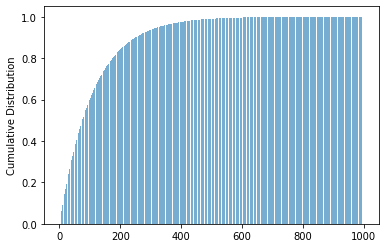

[0.         0.01       0.019      0.028      0.03691    0.045739
 0.054487   0.06315481 0.07174316 0.08025278 0.08868438 0.09703869
 0.10531642 0.11351826 0.12164491 0.12969706 0.1376754  0.1455806
 0.15341332 0.16117424 0.16886402 0.1764833  0.18403273 0.19151295
 0.1989246  0.20626831 0.21354469 0.22075437 0.22789796 0.23497605
 0.24198926 0.24893818 0.2558234  0.2626455  0.26940505 0.27610264
 0.28273883 0.28931419 0.29582926 0.30228461 0.30868079 0.31501832
 0.32129776 0.32751963 0.33368447 0.33979279 0.34584511 0.35184195
 0.35778382 0.36367121 0.36950463 0.37528458 0.38101154 0.386686
 0.39230843 0.39787933 0.40339916 0.40886838 0.41428747 0.41965687
 0.42497706 0.43024847 0.43547156 0.44064677 0.44577453 0.45085529
 0.45588947 0.46087749 0.4658198  0.47071679 0.47556889 0.48037652
 0.48514007 0.48985995 0.49453656 0.4991703  0.50376156 0.50831073
 0.51281819 0.51728434 0.52170954 0.52609418 0.53043862 0.53474324
 0.53900839 0.54323444 0.54742175 0.55157068 0.55568157 0.55975477


In [17]:
p0 = np.zeros((N))

for i in range(0, N):
    bin_repr = "{0:b}".format(i)
    k = bin_repr.count('1')
    p0[i] = (q**k) * (p**(ell-k))
       
print(p0, N, 1 - np.sum(p0))

M = 1000

Distribution = np.zeros((M))
Distribution[ell-1] = 1 - np.sum(p0)
p_next = np.dot(A,p0)

for i in range(ell,M-ell+1):
    Distribution[i] = 1 - np.sum(p_next)
    p_next = np.dot(A, p_next)
  
y_pos = np.arange(M)
plt.bar(y_pos, Distribution, align='center', alpha=0.6)
plt.ylabel('Cumulative Distribution')
plt.show()

print(Distribution)

Distribution

[0.81 0.09 0.09] 3 0.010000000000000009


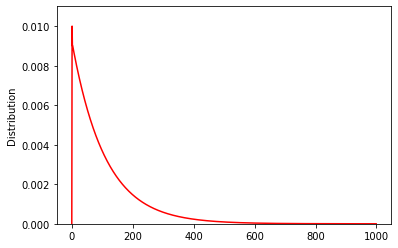

[0.00000000e+00 1.00000000e-02 9.00000000e-03 9.00000000e-03
 8.91000000e-03 8.82900000e-03 8.74800000e-03 8.66781000e-03
 8.58834900e-03 8.50961700e-03 8.43160671e-03 8.35431157e-03
 8.27772502e-03 8.20184056e-03 8.12665175e-03 8.05215223e-03
 7.97833566e-03 7.90519580e-03 7.83272643e-03 7.76092140e-03
 7.68977464e-03 7.61928010e-03 7.54943181e-03 7.48022384e-03
 7.41165032e-03 7.34370543e-03 7.27638342e-03 7.20967857e-03
 7.14358522e-03 7.07809777e-03 7.01321066e-03 6.94891839e-03
 6.88521551e-03 6.82209662e-03 6.75955635e-03 6.69758941e-03
 6.63619054e-03 6.57535453e-03 6.51507623e-03 6.45535051e-03
 6.39617232e-03 6.33753664e-03 6.27943848e-03 6.22187293e-03
 6.16483510e-03 6.10832016e-03 6.05232330e-03 5.99683978e-03
 5.94186490e-03 5.88739399e-03 5.83342243e-03 5.77994565e-03
 5.72695910e-03 5.67445830e-03 5.62243879e-03 5.57089616e-03
 5.51982604e-03 5.46922409e-03 5.41908602e-03 5.36940759e-03
 5.32018457e-03 5.27141280e-03 5.22308813e-03 5.17520647e-03
 5.12776375e-03 5.080755

In [18]:
p0 = np.zeros((N))

for i in range(0, N):
    bin_repr = "{0:b}".format(i)
    k = bin_repr.count('1')
    p0[i] = (q**k) * (p**(ell-k))
       
print(p0, N, 1- np.sum(p0))

M = 1000
distribution = np.zeros((M))
distribution[ell-1] = 1 - np.sum(p0)

p_next = np.dot(Id-A,p0)

for i in range(ell,M):
    distribution[i] = np.sum(p_next)
    p_next = np.dot(A, p_next)
  
y_pos = np.arange(len(distribution))
plt.plot(distribution, color='red', label='Distribution')
plt.ylabel('Distribution')
plt.ylim((.0, 1.1 * np.max(distribution)))
plt.show()


print(distribution, np.sum(distribution))   

Mean

In [19]:
mean = 0

for i in range(0,M):
    mean += (i+1) * distribution[i]
    
print(mean)

109.8880674142933


996.3 109.8880674142933


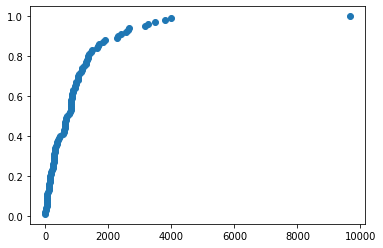

In [20]:
import random as rnd

def waiting_time(sequence):
    l = len(sequence)
    samples = []
    
    def _rand():
        if rnd.uniform(0, 1) <= p:
            return 0
        else:
            return 1
    
    for i in range(0, l):
        samples.append(_rand())
        
    counter = 0
    i = 2
        
    while counter < l:
        success = np.array([False for i in range(0, l)])
                
        for k in range(0, l): 
            if samples[len(samples) - k - 1] == 1:
                success[k] = True
          
        if np.sum(success) == l:
            return i
        else:
            i += 1
            samples.append(_rand())
            

nb_samples = 100          
samples = np.array([waiting_time([1, 1, 1]) for i in range(0,nb_samples)])

mean_emp = np.mean(samples)

print(mean_emp, mean)


def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
 
x,y = ecdf(samples)
plt.scatter(x=x, y=y)
plt.show()
    

Theoretical mean waiting time

In [21]:
B = inv(Id - A)
mean_theo = ell + np.sum(p0 + np.dot(A,np.dot(B, p0)))

print(mean_theo)

110.00000000000004


In [22]:
### compute mean symbolically

In [23]:
p = Symbol('p')
ell=3

In [ ]:
def get_A(ell):
    n = 2**ell-1
    A = np.zeros((n,n),dtype=object)

    for i in range(0,n):
        for j in range(0,n):
            if i == 2 * j or i == 2 * (j - 2**(ell-1)):
                A[i][j] = 1-p
            if i == 2 * j + 1 or i == 2 * (j - 2**(ell-1)) + 1:
                A[i][j] = p
                
    return Matrix(A)

In [ ]:
### create matrix A
A = get_A(ell) 
A

In [ ]:
def get_R(A):
    n = shape(A)[0]
    B = eye(n) - A
    print('Inverting B ...')
    R = B.inv()
    print('Simplifying R ...')
    R = simplify(R)
    
    S = np.zeros((1,n),dtype=object)
    
    for i_column in range(n):
        print('Computing column {0} ...'.format(i_column))
        for j_row in range(n):
            S[0,i_column] += R[j_row,i_column]
            
        S[0,i_column] = simplify(S[0,i_column])


    return R, Matrix(S)

In [ ]:
S_ell = []

for ell in [2,3]:
    A = get_A(ell)
    R, S = get_R(A)
    S_ell.append(S)
    print('Finished computation for {0}'.format(ell))

In [ ]:
S_ell[0]

In [ ]:
S_ell[1]

In [ ]:
def get_p0(ell):
    n = 2**ell-1
    p0 = np.zeros((n),dtype=object)

    for i in range(0,n):
        bin_repr = "{0:b}".format(i)
        k = bin_repr.count('1')
        p0[i] = (p**k) * ((1-p)**(ell-k))
        
    return Matrix(p0)

def get_q0(ell, R):
    p0 = get_p0(ell)
    q0=simplify(R*p0)
    
    s = .0

    for i, v in enumerate(q0):
        s += q0[i]

    s = simplify(s)
    r = s + ell
    
    return q0, s, r

In [ ]:
p0 = get_p0(ell)
p0

In [ ]:
a=simplify(S*p0)[0,0]+ell
a.subs(p, .1)

In [ ]:
q0, s, r = get_q0(ell, R)
r

In [ ]:
r.subs(p, .1)

In [24]:
r.subs(p, .1)

In [25]:
### create matrix A
A = get_A(ell) 
A

Matrix([
[1 - p,     0,     0,     0, 1 - p,     0,     0],
[    p,     0,     0,     0,     p,     0,     0],
[    0, 1 - p,     0,     0,     0, 1 - p,     0],
[    0,     p,     0,     0,     0,     p,     0],
[    0,     0, 1 - p,     0,     0,     0, 1 - p],
[    0,     0,     p,     0,     0,     0,     p],
[    0,     0,     0, 1 - p,     0,     0,     0]])

In [26]:
def get_R(A):
    n = shape(A)[0]
    B = eye(n) - A
    print('Inverting B ...')
    R = B.inv()
    print('Simplifying R ...')
    R = simplify(R)
    
    S = np.zeros((1,n),dtype=object)
    
    for i_column in range(n):
        print('Computing column {0} ...'.format(i_column))
        for j_row in range(n):
            S[0,i_column] += R[j_row,i_column]
            
        S[0,i_column] = simplify(S[0,i_column])


    return R, Matrix(S)

In [27]:
S_ell = []

for ell in [2,3]:
    A = get_A(ell)
    R, S = get_R(A)
    S_ell.append(S)
    print('Finished computation for {0}'.format(ell))

Inverting B ...
Simplifying R ...
Computing column 0 ...
Computing column 1 ...
Computing column 2 ...
Finished computation for 2
Inverting B ...
Simplifying R ...
Computing column 0 ...
Computing column 1 ...
Computing column 2 ...
Computing column 3 ...
Computing column 4 ...
Computing column 5 ...
Computing column 6 ...
Finished computation for 3


In [28]:
S_ell[0]

Matrix([[(p + 1)/p**2, p**(-2), (p + 1)/p**2]])

In [29]:
S_ell[1]

Matrix([[(p**2 + p + 1)/p**3, (p + 1)/p**3, (p**2 + p + 1)/p**3, p**(-3), (p**2 + p + 1)/p**3, (p + 1)/p**3, (p**2 + p + 1)/p**3]])

In [37]:
def get_p0(ell):
    n = 2**ell-1
    p0 = np.zeros((n),dtype=object)

    for i in range(0,n):
        bin_repr = "{0:b}".format(i)
        k = bin_repr.count('1')
        p0[i] = (p**k) * ((1-p)**(ell-k))
        
    return Matrix(p0)

def get_q0(ell, R):
    p0 = get_p0(ell)
    q0=simplify(R*p0)
    
    s = .0

    for i, v in enumerate(q0):
        s += q0[i]

    s = simplify(s)
    r = s + ell
    
    return q0, s, r

In [38]:
p0 = get_p0(ell)
p0

Matrix([
[  (1 - p)**3],
[p*(1 - p)**2],
[p*(1 - p)**2],
[p**2*(1 - p)],
[p*(1 - p)**2],
[p**2*(1 - p)],
[p**2*(1 - p)]])

In [41]:
a=simplify(S*p0)[0,0]+ell
a.subs(p, .1)

1110.00000000000

In [42]:
q0, s, r = get_q0(ell, R)
r

3 + (-3*p**3 + p**2 + p + 1)/p**3

In [43]:
r.subs(p, .1)

1110.00000000000